In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
from scipy.optimize import curve_fit

In [86]:
import matplotlib

def setplotstyle():
    matplotlib.rcParams['text.usetex'] = False
    matplotlib.rcParams['figure.figsize'] = (10, 7)
    matplotlib.rcParams['font.size'] = 16
    matplotlib.rcParams['axes.linewidth'] = 2.5
    for p in ['xtick', 'ytick']:
        matplotlib.rcParams[p+'.major.size'] = 10
        matplotlib.rcParams[p+'.minor.size'] = 2.5
        matplotlib.rcParams[p+'.major.width'] = 2.5
        matplotlib.rcParams[p+'.major.width'] = 1.5
        
R = const.R
hbar = const.hbar
kb = const.k

setplotstyle()

In [5]:
import wikitables

# https://en.wikipedia.org/wiki/Heat_capacities_of_the_elements_(data_page)
wiki_data, = wikitables.import_tables('Heat capacities of the elements (data page)')

Heat capacities of the elements (data page)[0][0]: missing field for column [J/(mol·K)]
Heat capacities of the elements (data page)[0][0]: missing field for column [J/(g·K)]
Heat capacities of the elements (data page)[0][3]: missing field for column [J/(g·K)]
Heat capacities of the elements (data page)[0][4]: missing field for column [J/(g·K)]
Heat capacities of the elements (data page)[0][5]: missing field for column [J/(mol·K)]
Heat capacities of the elements (data page)[0][5]: missing field for column [J/(g·K)]
Heat capacities of the elements (data page)[0][8]: missing field for column [J/(g·K)]
Heat capacities of the elements (data page)[0][9]: missing field for column [J/(g·K)]
Heat capacities of the elements (data page)[0][10]: missing field for column [J/(mol·K)]
Heat capacities of the elements (data page)[0][10]: missing field for column [J/(g·K)]
Heat capacities of the elements (data page)[0][13]: missing field for column [J/(g·K)]
Heat capacities of the elements (data page)[0

In [6]:
data = []
for n, r in enumerate(wiki_data.rows):
    if r[''].value[0] == '<':
        Z, symbol, element = r[''].value.split('> ')[1].split(' ')[:3]
        
        if wiki_data.rows[n+2][''].value == 'CRC':
            try:
                C = float(wiki_data.rows[n+2]['J/(mol·K)'].value)
            except ValueError:
                C = float(wiki_data.rows[n+2]['J/(mol·K)'].value.split(') ')[1])
                
            
            to_write = {
                'Atomic number' : int(Z),
                'Atomic symbol' : symbol,
                'Element' : element.capitalize(),
                'Specific heat' : C
            }
            
            data.append(to_write)    

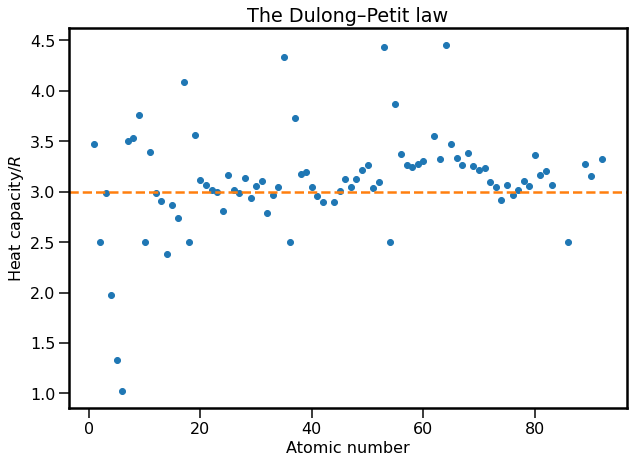

In [7]:
df = pd.DataFrame.from_dict(data)
plt.scatter(x = df['Atomic number'], y = df['Specific heat']/R)
plt.axhline(3, linestyle = '--', color = 'C1', linewidth = 2.5)

plt.title('The Dulong–Petit law')
plt.xlabel('Atomic number')
plt.ylabel('Heat capacity/$R$')
plt.savefig('01_Dulong-Petit.svg', facecolor='white', transparent=False)

plt.show()

In [45]:
# hovertext = df.T.apply(
#     lambda s: f'<sup>{s['Atomic number']}</sup>{s.['Atomic symbol']} '
#               f'[{s['Element']}]'
# )



# hovertext = df.apply(lambda x: f"{x['Atomic symbol']}-{x['Atomic number']}", axis = 1)
hovertext = None

fig = go.Figure(
    data=[
        go.Scatter(
            x=df['Atomic number'],
            y=df['Specific heat']/R,
            mode='markers+text',
            textposition='top center',
            hovertext=hovertext,
            hoverinfo='text'
        ),
    ],
    layout=go.Layout(
        title='Heat capacity of various chemical elements',
        autosize=True,
        yaxis=go.layout.YAxis(
            title='$C/k_B$',
            tick0=1,
            dtick=2,
        ),
        xaxis=go.layout.XAxis(
            title='Atomic number'
        ),
        hovermode='closest',
    ),
)

py.iplot(fig, show_link=False)


Thermal expansion coefficients of the elements (data page)[0][0]: missing field for column [μm · m−1 · K−1]
Thermal expansion coefficients of the elements (data page)[0][5]: missing field for column [μm · m−1 · K−1]
Thermal expansion coefficients of the elements (data page)[0][10]: missing field for column [μm · m−1 · K−1]
Thermal expansion coefficients of the elements (data page)[0][14]: missing field for column [μm · m−1 · K−1]
Thermal expansion coefficients of the elements (data page)[0][17]: missing field for column [μm · m−1 · K−1]
Thermal expansion coefficients of the elements (data page)[0][22]: missing field for column [μm · m−1 · K−1]
Thermal expansion coefficients of the elements (data page)[0][27]: missing field for column [μm · m−1 · K−1]
Thermal expansion coefficients of the elements (data page)[0][32]: missing field for column [μm · m−1 · K−1]
Thermal expansion coefficients of the elements (data page)[0][35]: missing field for column [μm · m−1 · K−1]
Thermal expansion coe

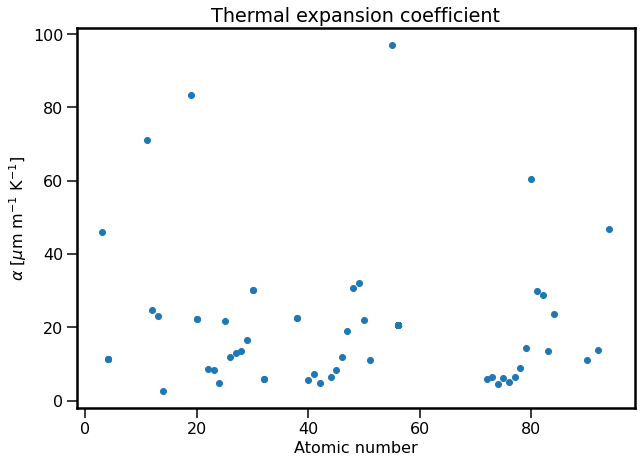

In [11]:
# https://en.wikipedia.org/wiki/Heat_capacities_of_the_elements_(data_page)
wiki_data, = wikitables.import_tables('Thermal expansion coefficients of the elements (data page)')

data = []
for n, r in enumerate(wiki_data.rows):
    if r[''].value[0] == '<':
        Z, symbol, element = r[''].value.split('> ')[1].split(' ')[:3]

        if wiki_data.rows[n+1][''].value == 'use':
            try:
                alpha = float(wiki_data.rows[n+1]['μm · m−1 · K−1'].value)
                
                to_write = {
                    'Atomic number' : int(Z),
                    'Atomic symbol' : symbol,
                    'Element' : element.capitalize(),
                    'Expansion' : alpha
                }
                
            except ValueError:
                pass
                
            data.append(to_write)    
            
df = pd.DataFrame.from_dict(data)
plt.scatter(x = df['Atomic number'], y = df['Expansion'])

plt.title('Thermal expansion coefficient')
plt.xlabel('Atomic number')
plt.ylabel(r'$\alpha$ [$\mu$m m$^{-1}$ K$^{-1}$]')
plt.savefig('01_alpha.svg', facecolor='white', transparent=False)

plt.show()

### Plot from Einstein's paper

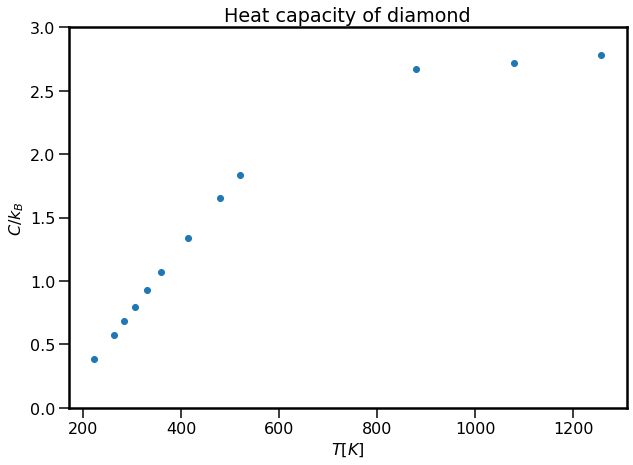

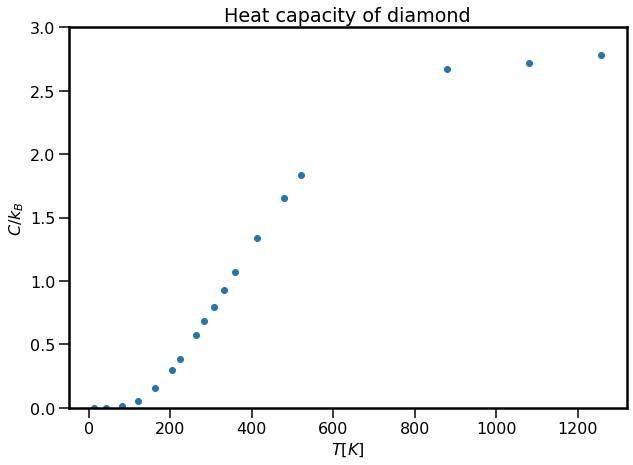

In [192]:
T_c = np.array([222.4, 262.4, 283.7, 306.4, 331.3, 358.5, 413.0, 479.2, 520.0, 879.7, 1079.7, 1258.0])
c_c = np.array([0.384, 0.578, 0.683, 0.798, 0.928, 1.069, 1.343, 1.656, 1.833, 2.671, 2.720, 2.781])

fig, ax = plt.subplots()
ax.scatter(T_c, c_c)
ax.set_xlabel('$T [K]$')
ax.set_ylabel('$C/k_B$')
ax.set_ylim((0, 3))
ax.set_title('Heat capacity of diamond');

plt.savefig('01_Einstein_diamond.svg', facecolor='white', transparent=False)

plt.show()

# Include low temperature data from https://www.tandfonline.com/doi/abs/10.1080/14786435808243223
T_cprime = np.array([203.157, 162.867, 120.283, 80.868, 41.319, 12.833])
c_cprime = np.array([0.5881, 0.3083, 0.1124, 0.02762, .00313, 0.000115])
c_cprime *= 4.1858 * 3/24.945 #24.954 is 3Nk_B

T_diamond = np.concatenate((T_cprime, T_c))
c_diamond = np.concatenate((c_cprime, c_c))

fig, ax = plt.subplots()
ax.scatter(T_diamond, c_diamond)
ax.set_xlabel('$T [K]$')
ax.set_ylabel('$C/k_B$')
ax.set_ylim((0, 3))
ax.set_title('Heat capacity of diamond')

plt.savefig('01_diamond_heat_capacity.svg', facecolor='white', transparent=False)

plt.show()

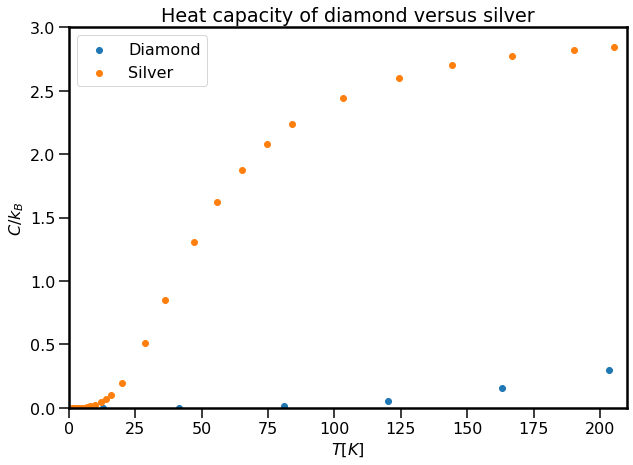

In [193]:
T_ag = np.array([1.35,2.,3.,4.,5.,6.,7.,8.,10.,12.,14.,16.,20.,28.56,36.16,47.09,55.88,65.19,74.56,83.91,103.14,124.2,144.38,166.78,190.17,205.3])
c_ag = np.array([0.,0.,0.,0.,0.,0.,0.0719648,0.1075288,0.2100368,0.364008,0.573208,0.866088,1.648496,4.242576,7.07096,10.8784,13.47248,15.60632,17.27992,18.6188,20.33424,21.63128,22.46808,23.05384,23.47224,23.68144])
c_ag *= 3/24.945 #24.954 is 3Nk_B

fig, ax = plt.subplots()
ax.scatter(T_diamond, c_diamond, label='Diamond', color = 'C0')
ax.scatter(T_ag, c_ag, label='Silver', color = 'C1')
ax.set_xlabel('$T [K]$')
ax.set_ylabel('$C/k_B$')
ax.set_ylim((0, 3))
ax.set_xlim((0, 210))
ax.set_title('Heat capacity of diamond versus silver');
ax.legend()

plt.savefig('02_heat_capacity_AgC.svg', facecolor='white', transparent=False)

plt.show()

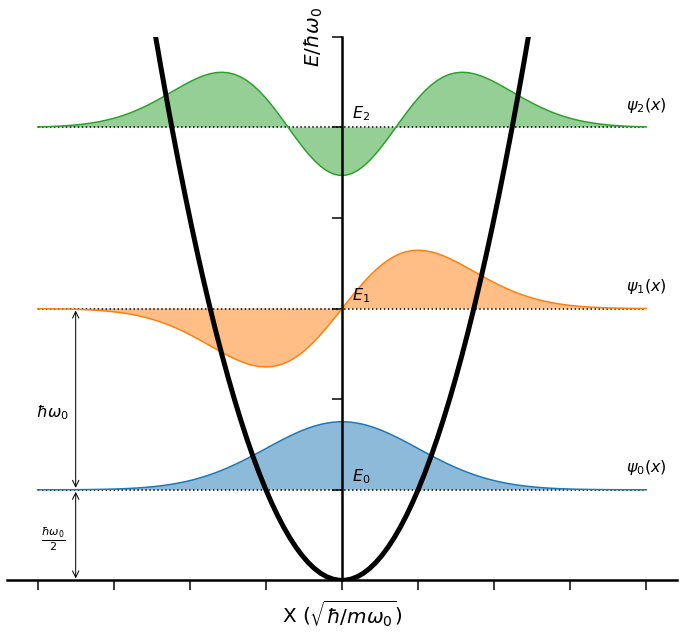

In [50]:
# import math
# from numpy.polynomial.hermite import Hermite

def ho_evec(x, n, no_states):

    """
    Calculate the wavefunction of states confined in the harmonic oscillator

    Input:
    ------
    x: numpy array of x coordinates (in units of hbar.omega)
    n: n^th bound state in the oscillator
    no_states: no of states confined

    Returns:
    --------
    Wavefunctions

    """

    # calculate hermite polynomial
    vec = [0] * no_states
    vec[n] = 1/2
    Hn = np.polynomial.hermite.Hermite(vec)

    return ((1/np.sqrt(np.math.factorial(n)*2**n))*
            pow(np.pi,-1/4)*
            np.exp(-pow(x, 2)/2)*
            Hn(x))

def h0_ener(n):
    """
    Calculate the energy of nth bound state
    """
    return (n + 1/2)

x = np.linspace(-4, 4, 100) #units of hbar.omega
no_states = 3 #no of bound states confined in the quantum well

omega = 1.0 #frequency of harmonic oscillator
V = 0.5*(omega**2)*(x**2)

fig, ax = plt.subplots(figsize=(12, 10))

for i in range(no_states):

    ax.hlines(h0_ener(i), x[0], x[len(x)-1], linestyles='dotted', colors='k')

    ax.plot(x, ho_evec(x, i, no_states) + h0_ener(i)) #plot wavefunctions


    # annotate plot
    # label each wavefunction
    ax.text(x[len(x)-1], h0_ener(i)+1/10, r'$\psi_%2i (x)$' %(i),
             horizontalalignment='center', fontsize=16)
    
    # label each energy
    ax.text(1/4, h0_ener(i)+1/20, '$E_%2i$' %(i),
             horizontalalignment='center', fontsize=16)
    
    # label energy spacing
    # ground-state energy
    if i==0:
        ax.text(x[0]+1/5, 2*h0_ener(i)/5, r'$\frac{\hbar\omega_0}{2}$',
                 horizontalalignment='center', fontsize=16)

        ax.annotate("", xy=(x[0]+1/2, h0_ener(i)-1/2),
                    xytext=(x[0]+1/2, h0_ener(i)),
                    arrowprops=dict(arrowstyle="<->"))
        
    # state-separation energy
    elif i==1:
        ax.text(x[0]+1/5, h0_ener(i-1)+2/5, r'$\hbar\omega_0$',
                 horizontalalignment='center', fontsize=16)
        
        ax.annotate("", xy=(x[0]+1/2, h0_ener(i)),
                    xytext=(x[0]+1/2, h0_ener(i-1)),
                    arrowprops=dict(arrowstyle="<->"))

    ax.fill_between(x, h0_ener(i), ho_evec(x, i, no_states) + h0_ener(i), alpha=0.5)

ax.plot(x, V, 'k', linewidth=5) # plot harmonic potential

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position(('data', 0.0))

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Eliminate x and y axes labels
ax.set_yticklabels([])
ax.set_xticklabels([])

# Set x and y labels
ax.set_xlabel('X '+ r'($\sqrt{\hbar/m\omega_0}$)', fontsize=20)
ax.set_ylabel('$E/\hbar\omega_0$', fontsize=20)
ax.yaxis.set_label_coords(0.475,1)

# Set the y limit
ax.set_ylim((0,no_states))

# Save the figure
plt.savefig('01_harmonic.svg', facecolor='white', transparent=False)

plt.show()

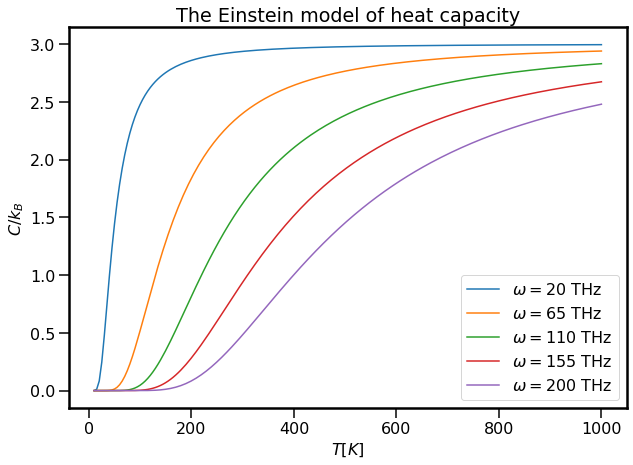

In [133]:
# Define an equation to calculate the heat capacity
def c_einstein(T, w):
    
    """
    Calculate the specific heat capacity according to the Einstein model of a solid
    
    Input:
    ---
    T: Temperature [K]
    w: Einstein frequency \omega [rad.s^-1]
    
    Returns:
    ---
    The heat capacity in units of k_B
    
    """
    
    x = (hbar * w)/(T * kb) # scale the variable
    return 3 * x**2 * np.exp(x) / (np.exp(x) - 1)**2 # compute the heat capacity

# The range of temperatures over which the heat capity will be calculated
# Note: overflow errors will occur is the x_min value is too small
temp = np.linspace(10, 1000, 200)

# The range of Einstein freqeuncies to be computed. For reference, diamond has \omega \approx 170
w = np.linspace(20, 200, 5)

# Create the plot instance
fig, ax = plt.subplots()
# Plot and label each frequency
for f in w:
    ax.plot(temp, c_einstein(temp, f*1e12), label=f'$\omega={f:.0f}$ THz')
    
# Make the plot readable
ax.set_xlabel('$T [K]$')
ax.set_ylabel(r'$C/k_B$');
ax.set_title(r'The Einstein model of heat capacity')
ax.legend()

# Save the figure
plt.savefig('01_Einstein_c.svg', facecolor='white', transparent=False)

plt.show() # Show the plot

<ipython-input-207-b80a84389679>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


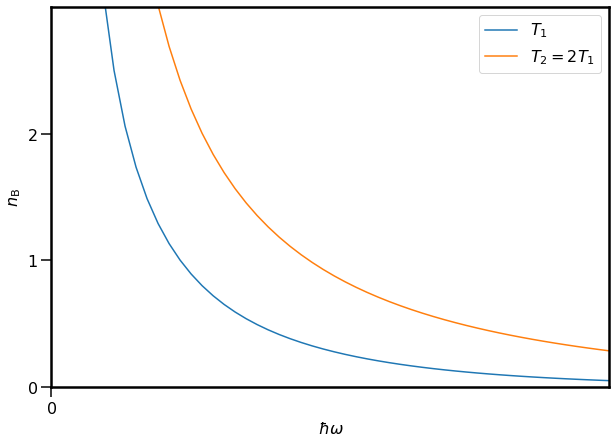

In [207]:
fig, ax = plt.subplots()

omega = np.linspace(0.1, 3)
T = [1,2]

ax.plot(omega, 1/(np.exp(omega/T[0]) - 1), label = r'$T_1$')
ax.plot(omega, 1/(np.exp(omega/T[1]) - 1), label = r'$T_2 = 2T_1$')
ax.set_ylim([0,3])
ax.set_xlim([0,3])
ax.set_xlabel('$\hbar \omega$')
ax.set_xticks([0])
ax.set_xticklabels(['$0$'])
ax.set_ylabel('$n_\mathrm{B}$')
ax.set_yticks([0,1, 2])
ax.set_yticklabels(['$0$','$1$', '$2$'])
ax.legend()

plt.savefig('01_Ex_0_2.svg', facecolor='white', transparent=False)

fig.show();